<a href="https://colab.research.google.com/github/Shubhranshu-Malhotra/Tensorflow-Developer-ZTM/blob/main/neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Network using TensorFlow

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Creating Regression Data to view and fit

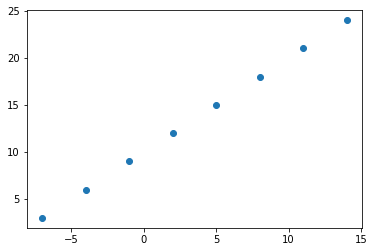

In [3]:
# Create Features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5., 8., 11. , 14.])

# Create labels
y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

# Visualize it
plt.scatter(X,y)

In [4]:
# The relation in X and y above is `y = X+10`
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [5]:
# Create a demo tensor for out housing price prediction problem

house_info = tf.constant(['bedrooms', 'bathrooms', 'garage'])
house_price = tf.constant([939700])
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedrooms', b'bathrooms', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In the data we created above we want to predict y using just one feature   
i.e. X[0] to predict y[0], X[1] to predict y[1], ...  
  
The shape of both input and output is `1`.

In [6]:
X[0], y[0]

(-7.0, 3.0)

## Turn Numpy arrays to tensors

In [7]:
# Lead data as float32 tensors
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

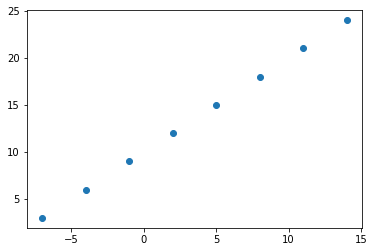

In [8]:
plt.scatter(X,y)

## Steps in modelling with TensorFlow
1.  **Creating a model** - define the `input and output` layers, `hidden layers`.
2.  **Compiling a model** - define the `loss function`(function that tells our model how wrong it is), `Optimizer` (tells our model how to improve the patterns it is learning) and `Evaluation Metrics` (to interpret the performance of our model).
3.  **Fitting a model** - letting the model `find patterns` between features and labels.

In [9]:
# Setting a random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
# model = tf.keras.Sequential([
#                              tf.keras.layers.Dense(1)
#                             ])

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(), 
              metrics = ['mae'])

# 3. Fit the model
model.fit(X, y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 564ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


In [10]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
y_pred = model.predict([17])
y_pred

array([[12.716021]], dtype=float32)

## Improving a model

We can improve our model by altering the steps we took to create a model.  

1.  **Creating a model** - Here we might add more layers, increase the number of hidden units(neurons) within each of these hidden layers, change the activation function of each layer.

2.  **Compiling a model** - here we might change the optimization function or the learning rate of the optimization function.

3.  **Fitting a model** - here we might fit the model for more epochs (longer training) or on more data (give model more examples to learn from).

In [ ]:
# Let's rebuild our model [with more epochs]

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# 3. Fit the model
model.fit(X,y,epochs = 100)


In [13]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
# Let's see if our model's prediction has improved ... [Correct = 27]
model.predict([17])

array([[29.739855]], dtype=float32)

In [ ]:
# Let's rebuild our model [with more epochs and 1 additional hidden layer]

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation = 'relu'),
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# 3. Fit the model
model.fit(X,y,epochs = 100)


In [28]:
# Let's see if our model's prediction has improved ... [Correct = 27]
model.predict([17])  # Prediction worse than one with higher training mae (may be because of overfitting)

array([[31.5545]], dtype=float32)

In [ ]:
# Let's rebuild our model [with more epochs, add a layer, Adam optimizers, higher learning rate]

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(50, activation = None),
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              metrics = ['mae'])

# 3. Fit the model
model.fit(X,y,epochs = 100)


In [31]:
model.predict([17])

array([[26.587704]], dtype=float32)

## Evaluating a model
  
  
A general workflow for building a NN model involves:
```
Build a model -> fit it -> Evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> ...
``` 

When it comes to evaluation, the most important thing is:
> "Visualize, Visualize, Visualize"

It's a good adea to visualize:  
*  `Data` - what data are we working it? what does it look like?
*  `Model itself` - What does our model look like? How fast or slow is it?
*  `Training of the model` - How is a model learning? What is the loss during training? Is our model overfitting/underfitting?
*  `Predictions of the model` - How do the model predictions line up with the ground truth? Do the predictions make sense?
*  `Metrics used` - Which metrics is more important for us? How well does our model perform on that metrics?



In [32]:
X= tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [33]:
# Make labels for our X
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

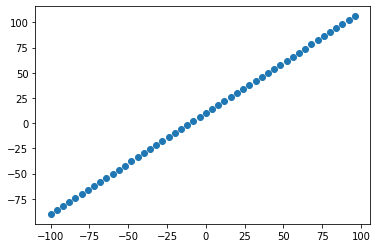

In [34]:
# Visualize our data
plt.scatter(X,y)

Before we get furthur into Evaluating and visualizing furthur let us explore the 3 sets...

# New Data


## The 3 sets...
*  Training set - the model learns from this data, 70-80%
*  Validation set - to tune the hyperparameters, 10-15%
*  Test set - to evaluate final performance, 10-15%

In [35]:
# Split data into 2 sets
X_train = X[:40] # First 40 data points
y_train = y[:40]
X_test = X[40:] # Last 10 data points
y_test = y[40:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

## Visualization

### Visualizing the data

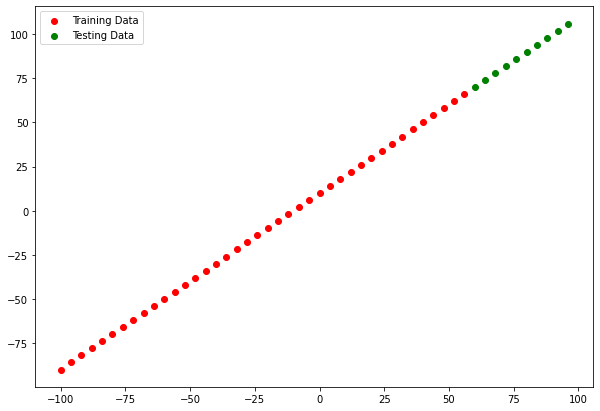

In [38]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, color = 'red', label = 'Training Data')
plt.scatter(X_test, y_test, color = 'green', label = 'Testing Data')
plt.legend();

### Creating a Model

In [ ]:
# 1) Create a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2) Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# 3) Fit the model
# model.fit(X_train, y_train, epochs = 100)

### Visualizing the model

In [40]:
# The model needs to be built before using this function
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 50)                100       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [55]:
# Let's build a model that is built automatically by specifying the input_shape uin the input layer
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10, input_shape = [1], name = 'input_layer'),
                             tf.keras.layers.Dense(1, name = 'output_layer')
], name = 'sample_model')

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

In [56]:
model.summary()

Model: "sample_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of patterns that our model is going to learn.
* Trainable params - the number of parameters (patterns) that our model can update while training.
* Non-trainable params - these parameters aren't updated during training. This is typically when you are working with a pretrained model (transfer learning).

**Resource**: For a more in-depth overview of trainable parameters within a layer, check out MIT's Introduction to Deep Learning video.

In [57]:
# Fit the model
model.fit(X_train, y_train, epochs = 100, verbose = 0)

In [58]:
# Get summary of our current model
model.summary()

Model: "sample_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### Another way to visualize the model [Important]

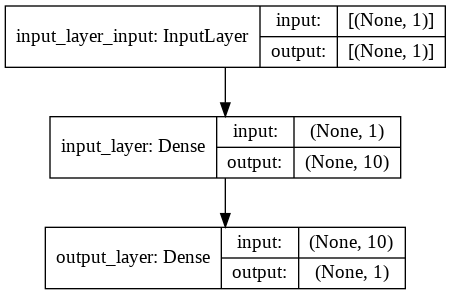

In [59]:
# Another way to visualize the model
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

### Visualizing our model's predictions